In [1]:
import gzip
import os
import numpy as np

train_data = os.path.join("..", "data", "mnist", "train-images-idx3-ubyte.gz")
train_labels = os.path.join("..", "data", "mnist", "train-labels-idx1-ubyte.gz")

test_data = os.path.join("..", "data", "mnist", "t10k-images-idx3-ubyte.gz")
test_labels = os.path.join("..", "data", "mnist", "t10k-labels-idx1-ubyte.gz")

In [2]:
def mnist_images(filename):
    with gzip.open(filename, "rb") as file:
        data = np.frombuffer(file.read(), np.uint8, offset = 16)
        return data.reshape(-1, 28, 28) / 255
    
def mnist_labels(filename):
    with gzip.open(filename, "rb") as file:
        return np.frombuffer(file.read(), np.uint8, offset = 8)

X_train = mnist_images(train_data)
y_train = mnist_labels(train_labels)

X_test = mnist_images(test_data)
y_test = mnist_labels(test_labels)

5


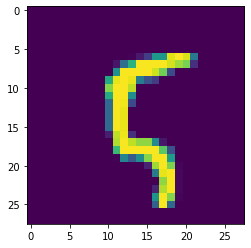

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[100])
plt.imshow(X_train[100])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#Dimension 3 -> 2 
X_train_reshape = X_train.reshape(-1,28*28)
X_test_reshape = X_test.reshape(-1,28*28)

s = StandardScaler()
s.fit_transform(X_train_reshape)
s.transform(X_test_reshape)
 
model = SVC(
    C=3.2,
    kernel='rbf',
    degree=2,
    gamma=0.021,
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.0005,
    cache_size=500,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None,
)

model.fit(X_train_reshape, y_train)
print(model.score(X_train_reshape, y_train))
print(model.score(X_test_reshape, y_test))
 

0.9995333333333334
0.9851


In [ ]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(solver = "saga", n_jobs = 4)
model2.fit(X_train_reshape, y_train)

model2.score(X_test_reshape, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
model3 = RandomForestClassifier(criterion = "gini", n_estimators=1000)
model3.fit(X_train_reshape, y_train)
 
model3.score(X_test_reshape, y_test)

In [ ]:
%matplotlib tk
 
def get_pixels(canvas):
    width = int(canvas["width"])
    height = int(canvas["height"])
    colors = []
 
    for y in range(0, height, 10):
        row = []
        for x in range(0, width, 10):
            row.append(get_pixel_color(canvas, x, y))
        colors.append(row)
    return np.array(colors)
 
def get_pixel_color(canvas, x, y):
    ids = canvas.find_overlapping(x, y, x, y)
    if len(ids) > 0:
        return 1.0
    return 0.0
    
from tkinter import *
 
canvas_width = 280
canvas_height =280
 
def paint( event ):
    # "Pixel" in 10facher Vergrößerung zeichnen:
    x1, y1 = ( (event.x//10)*10 ), ( (event.y//10)*10 )
    x2, y2 = x1+10, y1+10
    canvas.create_rectangle( x1, y1, x2, y2, fill = "#202020" )
    
    
def antialias(data):
    new_data = np.zeros((28,28))
    for x in range(1,27):
        for y in range(1,27):
            new_data[x, y]=(data[x-1, y-1]+data[x, y-1]+data[x+1, y-1]+
                               data[x-1, y]+8*data[x, y]+data[x+1, y]+
                               data[x-1, y+1]+data[x, y+1]+data[x+1, y+1])/16
    return new_data    
 
def clear( event ):
    data = antialias(get_pixels(canvas))
    plt.imshow(data)
    plt.show()
    print("predict: ", model.predict(data.reshape(-1, 784)))
    canvas.delete(ALL)
    
canvas = Canvas(Tk(), width=canvas_width, height=canvas_height)
canvas.pack()
canvas.create_text(140, 100, text="mit linker Maustaste zeichnen" )
canvas.create_text(140, 140, text="mit rechter Maustaste übernehmen" )
canvas.bind('<B1-Motion>', paint)
canvas.bind('<Button-3>', clear)
mainloop()